In [35]:
# import sys
# !{sys.executable} -m pip install scikit-bio==0.2

In [63]:
from skbio.stats.distance import (DissimilarityMatrixError,
                                  DistanceMatrixError, mantel, pwmantel)

ModuleNotFoundError: No module named 'skbio'

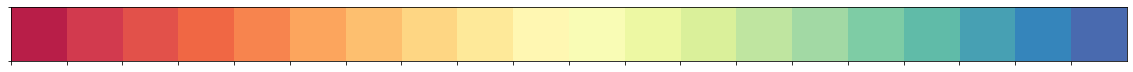

In [17]:
import pandas as pd
import numpy as np
import scipy 
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
import textwrap3
from textwrap3 import wrap
import mantel
from scipy.spatial.distance import pdist

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"

pal = sns.color_palette("Spectral", 20)
customPalette = pal.as_hex()
sns.set_palette(customPalette)
sns.palplot(customPalette)

In [64]:
dist1 = pd.read_table('/work/projects/ecosystem_biology/archaea/coevolution/test/a_100000.mat',
                      sep='\t', index_col=False, header=None)
dist2 = pd.read_table('/work/projects/ecosystem_biology/archaea/coevolution/test/b_1159510.mat')

In [61]:
dist1 = pd.read_table('/work/projects/coevolution/phylogeny/distance_matrices/all_bac_VS_GU_arch/a_100102.mat',
                      sep='\t', index_col=False, header=None)
dist2 = pd.read_table('/work/projects/coevolution/phylogeny/distance_matrices/all_bac_VS_GU_arch/a_100243.mat')

In [65]:
dist2

0.000000  0.018072  0.011696  0.011696.1  0.023392  0.023392.1  \
0   0.018072  0.000000  0.018072    0.018072  0.030120    0.018072   
1   0.011696  0.018072  0.000000    0.000000  0.035088    0.023392   
2   0.011696  0.018072  0.000000    0.000000  0.035088    0.023392   
3   0.023392  0.030120  0.035088    0.035088  0.000000    0.023392   
4   0.023392  0.018072  0.023392    0.023392  0.023392    0.000000   
5   0.011696  0.018072  0.000000    0.000000  0.035088    0.023392   
6   0.018072  0.000000  0.018072    0.018072  0.030120    0.018072   
7   0.018072  0.000000  0.018072    0.018072  0.030120    0.018072   
8   0.018072  0.000000  0.018072    0.018072  0.030120    0.018072   
9   0.011696  0.018072  0.000000    0.000000  0.035088    0.023392   
10  0.011696  0.018072  0.000000    0.000000  0.035088    0.023392   
11  0.011696  0.018072  0.000000    0.000000  0.035088    0.023392   
12  0.023392  0.018072  0.023392    0.023392  0.035088    0.023392   
13  0.011696  0.018072  0.023392    0.023392  0.023392    0.023392   
14  0.011696  0.018072  0.000000    0.000000  0.035088    0.023392   
15  0.011696  0.018072  0.000000    0.000000  0.035088    0.023392   

    0.011696.2  0.018072.1  0.018072.2  0.018072.3  0.011696.3  0.011696.4  \
0     0.018072    0.000000    0.000000    0.000000    0.018072    0.018072   
1     0.000000    0.018072    0.018072    0.018072    0.000000    0.000000   
2     0.000000    0.018072    0.018072    0.018072    0.000000    0.000000   
3     0.035088    0.030120    0.030120    0.030120    0.035088    0.035088   
4     0.023392    0.018072    0.018072    0.018072    0.023392    0.023392   
5     0.000000    0.018072    0.018072    0.018072    0.000000    0.000000   
6     0.018072    0.000000    0.000000    0.000000    0.018072    0.018072   
7     0.018072    0.000000    0.000000    0.000000    0.018072    0.018072   
8     0.018072    0.000000    0.000000    0.000000    0.018072    0.018072   
9     0.000000    0.018072    0.018072    0.018072    0.000000    0.000000   
10    0.000000    0.018072    0.018072    0.018072    0.000000    0.000000   
11    0.000000    0.018072    0.018072    0.018072    0.000000    0.000000   
12    0.023392    0.018072    0.018072    0.018072    0.023392    0.023392   
13    0.023392    0.018072    0.018072    0.018072    0.023392    0.023392   
14    0.000000    0.018072    0.018072    0.018072    0.000000    0.000000   
15    0.000000    0.018072    0.018072    0.018072    0.000000    0.000000   

    0.011696.5  0.023392.2  0.011696.6  0.011696.7  0.011696.8  
0     0.018072    0.018072    0.018072    0.018072    0.018072  
1     0.000000    0.023392    0.023392    0.000000    0.000000  
2     0.000000    0.023392    0.023392    0.000000    0.000000  
3     0.035088    0.035088    0.023392    0.035088    0.035088  
4     0.023392    0.023392    0.023392    0.023392    0.023392  
5     0.000000    0.023392    0.023392    0.000000    0.000000  
6     0.018072    0.018072    0.018072    0.018072    0.018072  
7     0.018072    0.018072    0.018072    0.018072    0.018072  
8     0.018072    0.018072    0.018072    0.018072    0.018072  
9     0.000000    0.023392    0.023392    0.000000    0.000000  
10    0.000000    0.023392    0.023392    0.000000    0.000000  
11    0.000000    0.023392    0.023392    0.000000    0.000000  
12    0.023392    0.000000    0.023392    0.023392    0.023392  
13    0.023392    0.023392    0.000000    0.023392    0.023392  
14    0.000000    0.023392    0.023392    0.000000    0.000000  
15    0.000000    0.023392    0.023392    0.000000    0.000000

In [52]:
dist1.shape

(8, 11)

In [21]:
dist1.shape, dist2.shape

((8, 10), (33, 35))

In [22]:
pdist(dist1)

array([0.0851407, 0.0851407, 0.0851407, 0.0851407, 0.0851407, 0.0851407,
       0.0851407, 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       ])

In [23]:
mantel.test(pdist(dist1), pdist(dist2))

ValueError: X and Y are not of equal size